<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


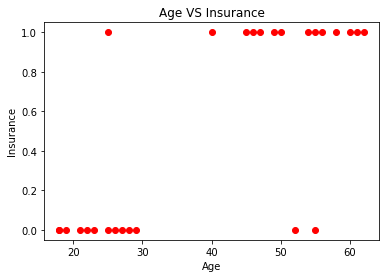

In [4]:
plt.scatter(df.age,df.bought_insurance,color='red',marker='o')
plt.title("Age VS Insurance")
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.show()

In [5]:
df.shape

(27, 2)

In [6]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [7]:
X=df.drop(columns=['bought_insurance'])
y=df['bought_insurance']

In [8]:
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [9]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

C:\Users\P\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
X_train

,age
23,45
4,46
22,40
10,18
13,29
3,52
14,49
8,62
18,19
12,27


In [14]:
X_test

,age
21,26
2,47
6,55
17,58
20,21
5,56


In [15]:
y_train

23    1
4     1
22    1
10    0
13    0
3     0
14    1
8     1
18    0
12    0
15    1
7     1
9     1
19    0
16    1
11    0
1     0
0     0
26    0
25    1
24    1
Name: bought_insurance, dtype: int64

In [16]:
y_test

21    0
2     1
6     0
17    1
20    0
5     1
Name: bought_insurance, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 1, 1, 0, 1], dtype=int64)

In [21]:
pd.DataFrame({'y_test':y_test,'y_predict':y_predicted})

,y_test,y_predict
21,0,0
2,1,1
6,0,1
17,1,1
20,0,0
5,1,1


In [22]:
model.predict_proba(X_test)

array([[0.83941435, 0.16058565],
       [0.16466774, 0.83533226],
       [0.05352596, 0.94647404],
       [0.03419672, 0.96580328],
       [0.91940574, 0.08059426],
       [0.04614772, 0.95385228]])

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_predicted

In [ ]:
X_test

**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

**Lets defined sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [ ]:
age = 43
prediction_function(age)

**0.485 is more than 0.5 which means person with 43 will buy the insurance**